Projeto Análise de Banco

In [1]:
# Manipulaçao de Dados
import pandas as pd
import numpy as np

#Análise Exploratória
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#Configurações
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)

In [2]:
# Exportação do Dataset

In [5]:
bank = pd.read_csv(r'C:\Users\Henry\OneDrive\Desktop\Projetos\bank-full.csv',sep=';')

In [6]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Entendendo o Dataset

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
numericas = bank.columns[bank.nunique()>=15]
categoricas = bank.columns[bank.nunique()< 15]
print(f' Temos {len(numericas)} colunas numéricas e {len(categoricas)} colunas categóricas') 

 Temos 7 colunas numéricas e 10 colunas categóricas


In [12]:
bank['y'] = bank['y'].map({
    'yes':1,
    'no':0
})

In [13]:
proporcao_aquisicao = bank['y'].value_counts(normalize=True).reset_index()

In [15]:
proporcao_aquisicao

,y,proportion
0,0,0.883015
1,1,0.116985


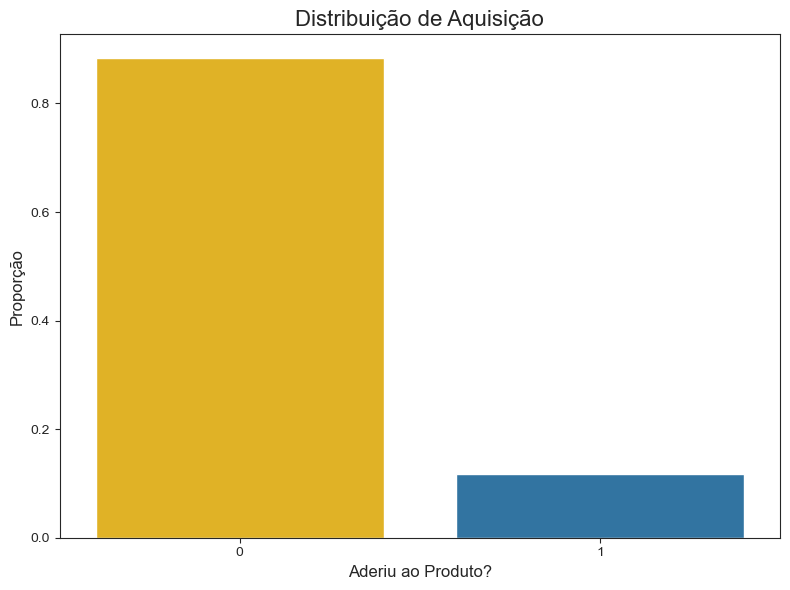

In [17]:
colors= ['#FFC107', '#1F77B4']

sns.set_style('ticks')

plt.figure(figsize=(8, 6), facecolor=None)

ax = sns.barplot(data=proporcao_aquisicao, x='y', y='proportion', palette=colors)
ax.set_facecolor('none')

plt.title('Distribuição de Aquisição',fontsize=16 ),
plt.xlabel('Aderiu ao Produto?', fontsize=12),
plt.ylabel('Proporção', fontsize=12)
plt.tight_layout()


plt.savefig('grafico_barras.png', format='png', dpi=300)

plt.show()



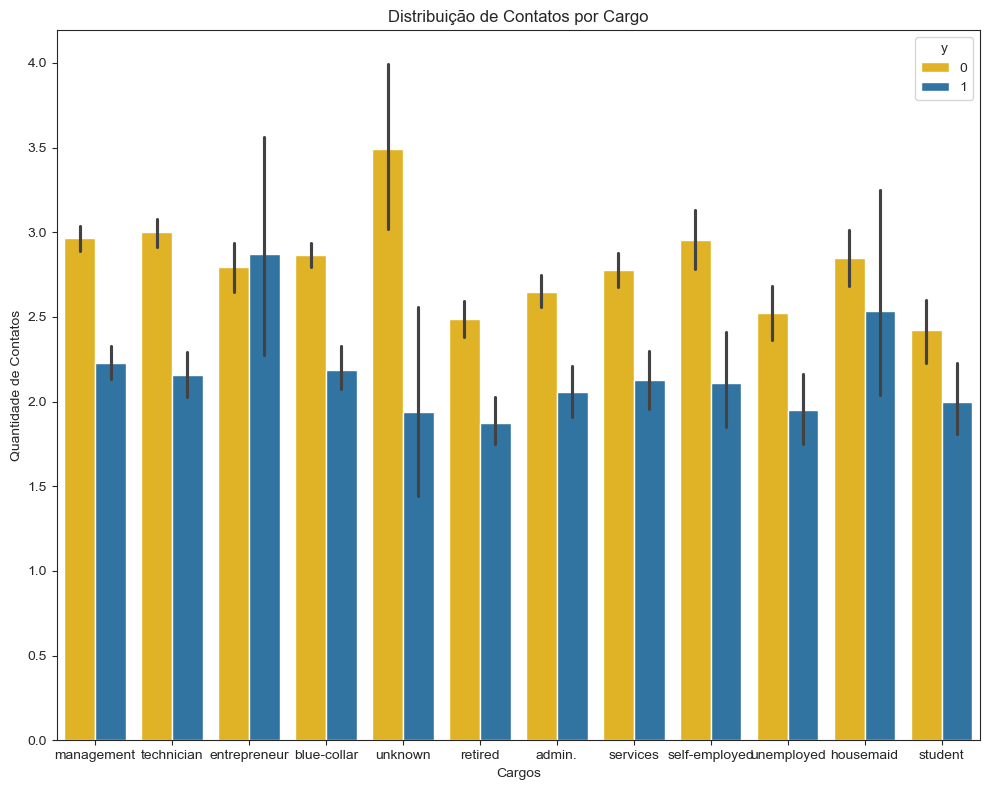

In [18]:
plt.figure(figsize=(10,8))

sns.barplot(x='job', y='campaign', hue='y', palette=colors, data=bank)
plt.title('Distribuição de Contatos por Cargo'),
plt.xlabel('Cargos'),
plt.ylabel('Quantidade de Contatos')
plt.tight_layout()

plt.show()

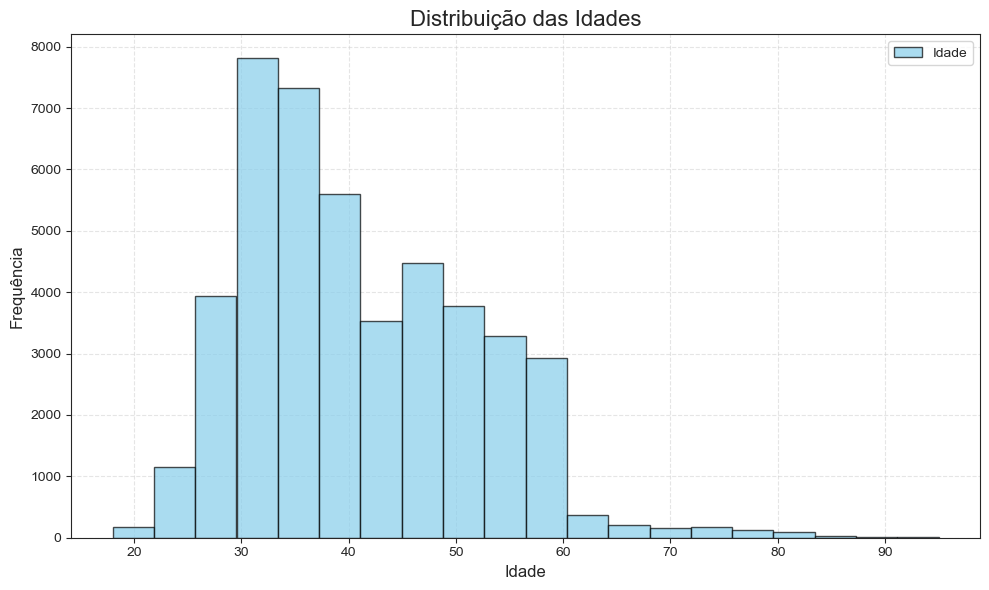

In [19]:
plt.figure(figsize=(10, 6))  


plt.hist(bank['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Idade')

plt.title('Distribuição das Idades', fontsize=16)
plt.xlabel('Idade', fontsize=12)           
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [20]:
# É possível perceber a distribuição das idades no histograma acima, a idade que mais se destaca é entre 30 e 40 anos;
# Vislumbrando a distribuição de ligações por cargo não é possível ter definições concisas

In [21]:
bank.groupby('y')['job'].value_counts()

y  job          
0  blue-collar      9024
   management       8157
   technician       6757
   admin.           4540
   services         3785
   retired          1748
   self-employed    1392
   entrepreneur     1364
   housemaid        1131
   unemployed       1101
   student           669
   unknown           254
1  management       1301
   technician        840
   blue-collar       708
   admin.            631
   retired           516
   services          369
   student           269
   unemployed        202
   self-employed     187
   entrepreneur      123
   housemaid         109
   unknown            34
Name: count, dtype: int64

In [23]:
# Management, technician, blue-collar e admon contém a maior frequência de aquisições, entretanto, students, retireds e services possuem uma boa taxa de aquisições

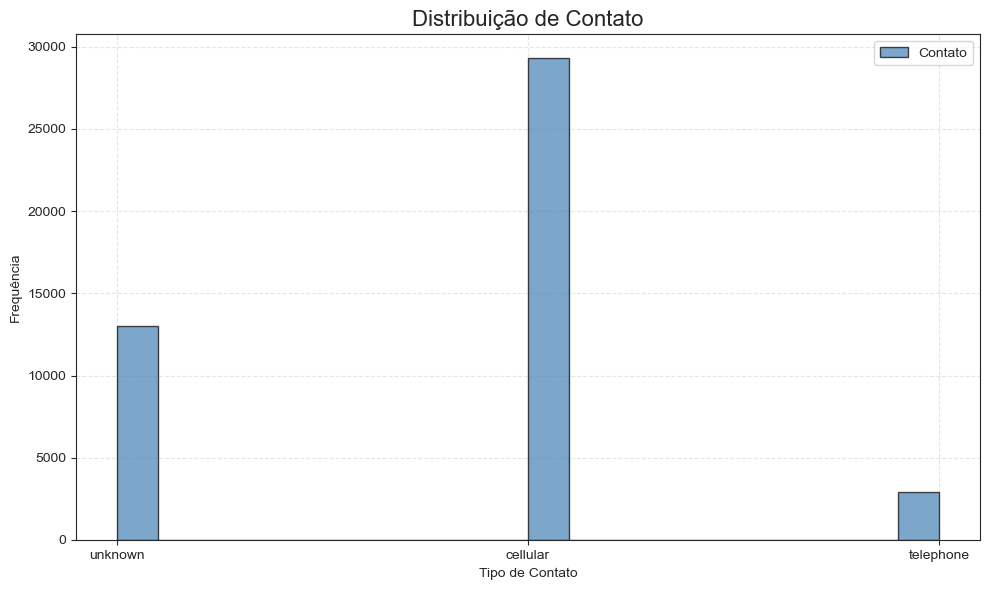

In [22]:
plt.figure(figsize=(10, 6))

plt.hist(bank['contact'], bins=20, color='steelblue', edgecolor='black', alpha=0.7, label='Contato')
plt.title('Distribuição de Contato', fontsize=16)
plt.xlabel('Tipo de Contato', fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

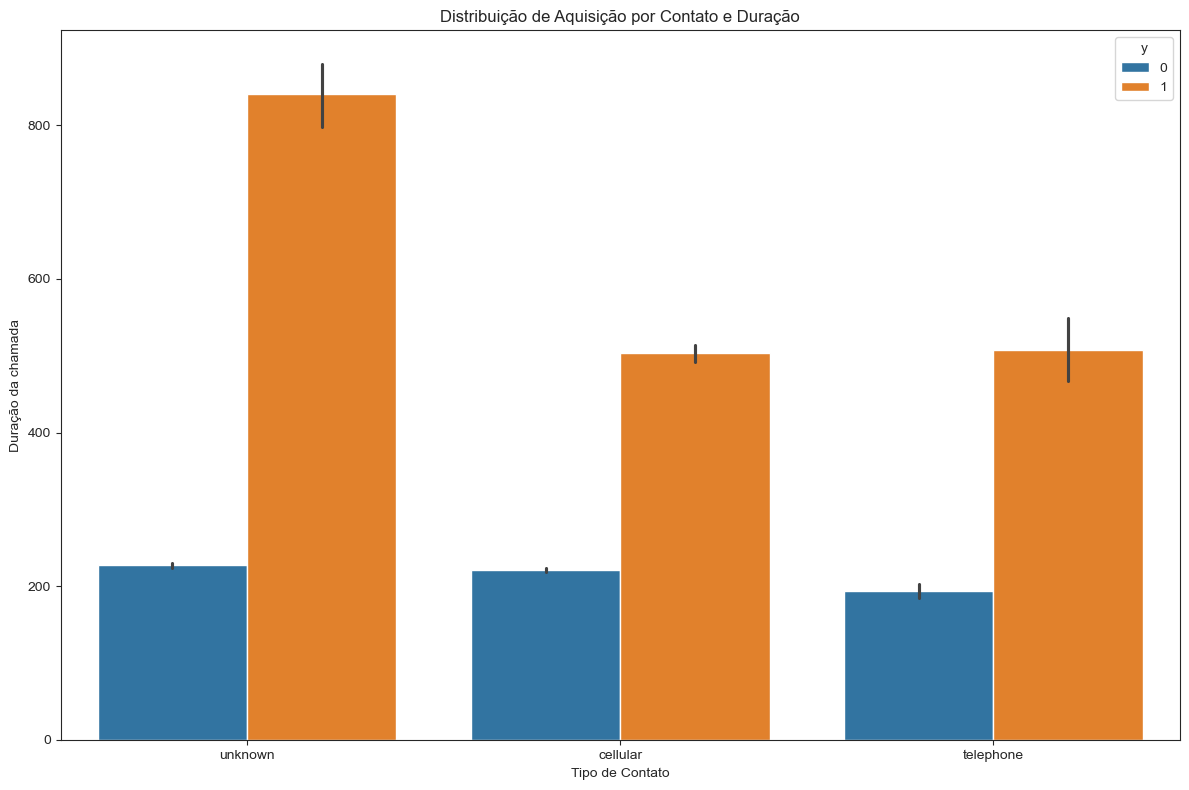

In [24]:
plt.figure(figsize=(12, 8))


sns.barplot(data=bank, x='contact', y='duration', hue='y')
plt.title('Distribuição de Aquisição por Contato e Duração'),
plt.xlabel('Tipo de Contato'),
plt.ylabel('Duração da chamada')
plt.tight_layout()
plt.show()

In [ ]:
# Celulares predominam as campanhas. É perceptível que chamadas de 200 segundo são ótimas para a conversão, enquanto, as que possuem uma longa duração, acaba fracassando

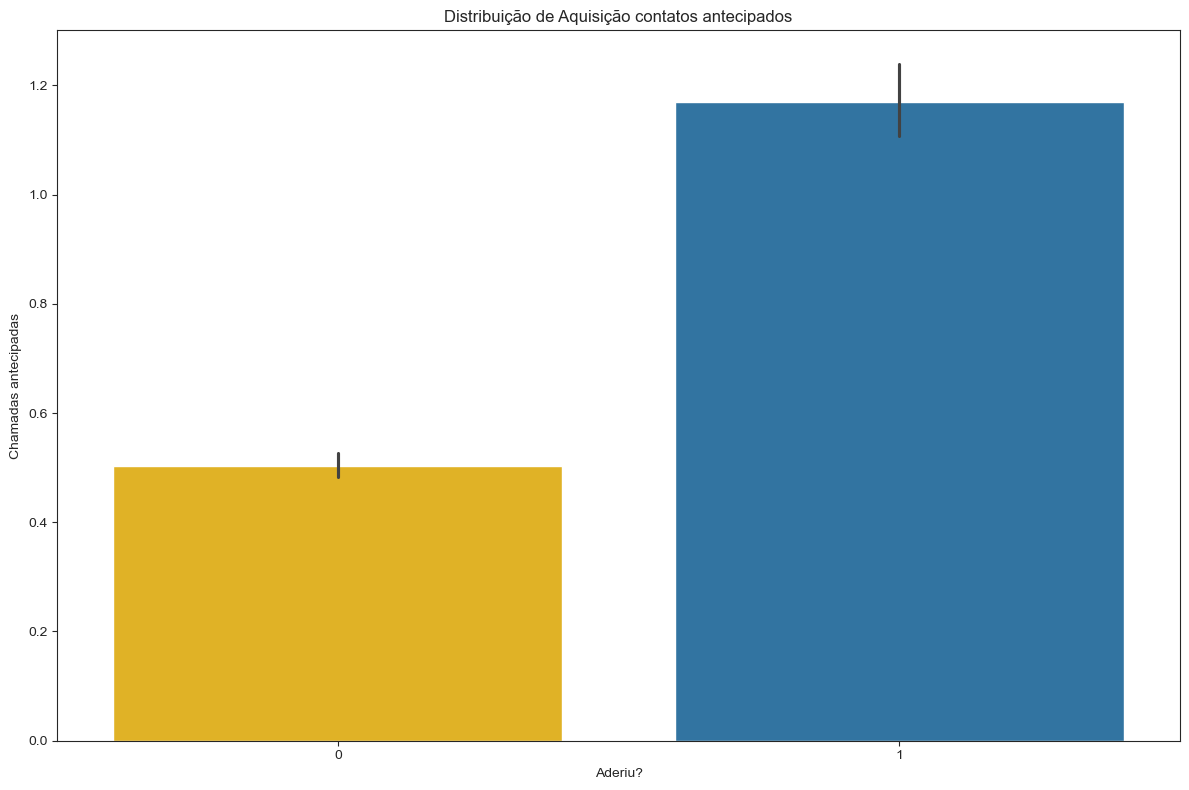

In [25]:
plt.figure(figsize=(12, 8))


sns.barplot(data=bank, x='y', y='previous', palette=colors)
plt.title('Distribuição de Aquisição contatos antecipados'),
plt.xlabel('Aderiu?'),
plt.ylabel('Chamadas antecipadas')
plt.tight_layout()
plt.show()

In [ ]:
#Chamadas antecipadas demonstram um potencial de conversão maior

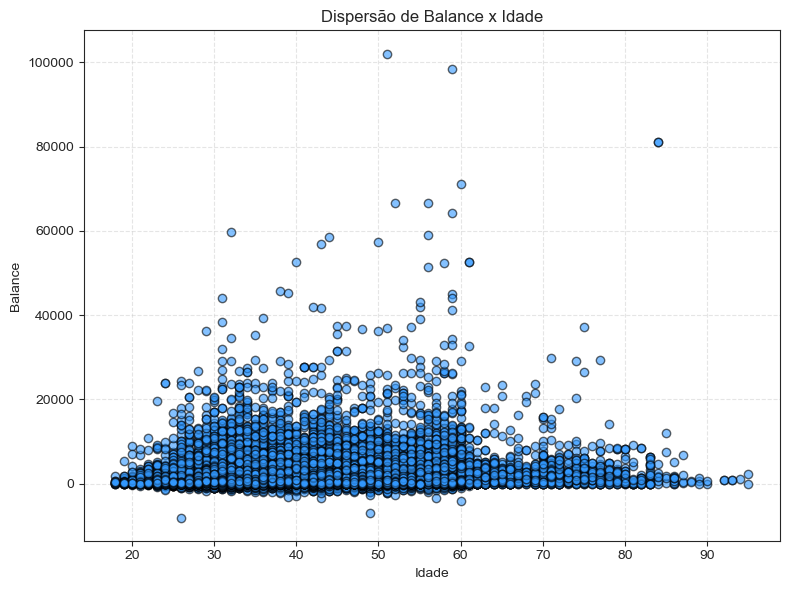

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(bank['age'], bank['balance'], color='#3399ff',alpha=0.6,edgecolors='k' )

ax.set_title('Dispersão de Balance x Idade', fontsize=12),
ax.set_xlabel('Idade', fontsize=10),
ax.set_ylabel('Balance', fontsize=10)

ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [27]:
# Continuando a fazer análises bivariadas, vamos agora verificar se há alguma ligação entre algumas variáveis:

balance_house = bank.groupby('housing')['balance'].mean()

balance_inad = bank.groupby('default')['balance'].mean()

balance_empres = bank.groupby('loan')['balance'].mean()

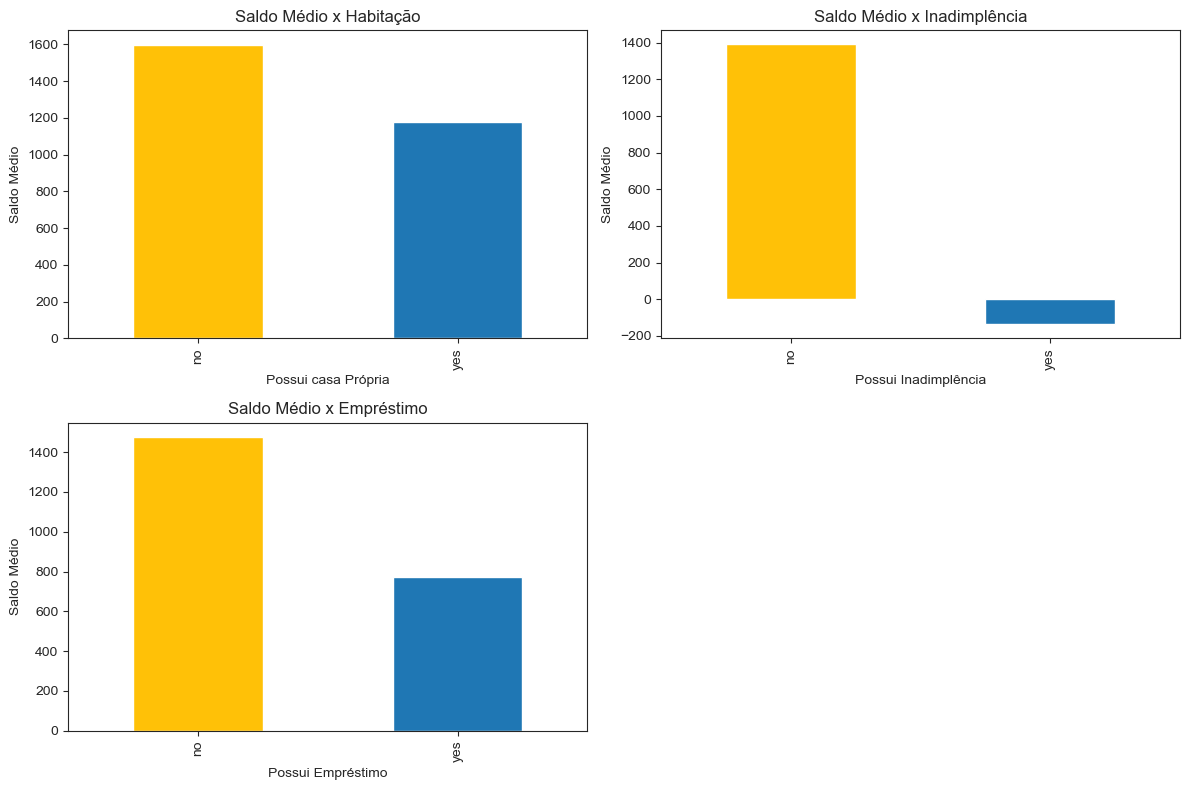

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Balanço por casa
balance_house.plot(kind='bar', ax=axes[0, 0], color=colors)
axes[0, 0].set_xlabel('Possui casa Própria')
axes[0, 0].set_ylabel('Saldo Médio')
axes[0, 0].set_title('Saldo Médio x Habitação')

# Saldo por Inadimplência
balance_inad.plot(kind='bar', ax=axes[0, 1], color=colors)
axes[0, 1].set_xlabel('Possui Inadimplência')
axes[0, 1].set_ylabel('Saldo Médio')
axes[0, 1].set_title('Saldo Médio x Inadimplência')

# Saldo por Empréstimo
balance_empres.plot(kind='bar', ax=axes[1, 0], color=colors)
axes[1, 0].set_xlabel('Possui Empréstimo')
axes[1, 0].set_ylabel('Saldo Médio')
axes[1, 0].set_title('Saldo Médio x Empréstimo')

axes[1, 1].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

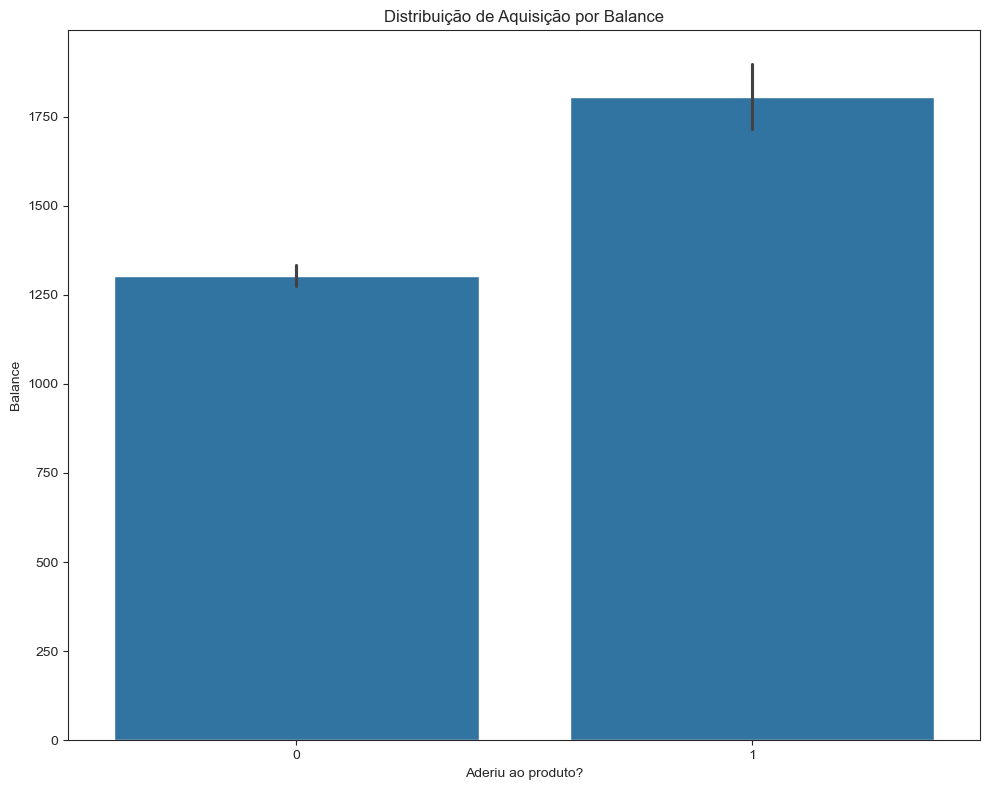

In [30]:
plt.figure(figsize=(10,8))

sns.barplot(x='y', y='balance', data=bank)

plt.title('Distribuição de Aquisição por Balance'),
plt.xlabel('Aderiu ao produto?'),
plt.ylabel('Balance'),
plt.tight_layout()

plt.show()

In [ ]:
# Os inadimplentes são o grupo com a menor saldo média;
# O saldo médio dos que aderiram o produto é significativamente maior do que a oposição.

In [33]:
# Sobre o produto, vamos analisar se alguma das condições verificadas acima afetam a aquisição do produto

In [31]:
media_default = bank.groupby('default')['y'].mean().reset_index()
media_default['y'] = media_default['y'].round(2)

media_housing = bank.groupby('housing')['y'].mean().reset_index()
media_housing['y'] = media_housing['y'].round(2)

media_loan = bank.groupby('loan')['y'].mean().reset_index()
media_loan['y'] = media_loan['y'].round(2)

education_y = bank.groupby('education')['y'].value_counts().reset_index()

print(media_default)
print(media_housing)
print(media_loan)


  default     y
0      no  0.12
1     yes  0.06
  housing     y
0      no  0.17
1     yes  0.08
  loan     y
0   no  0.13
1  yes  0.07


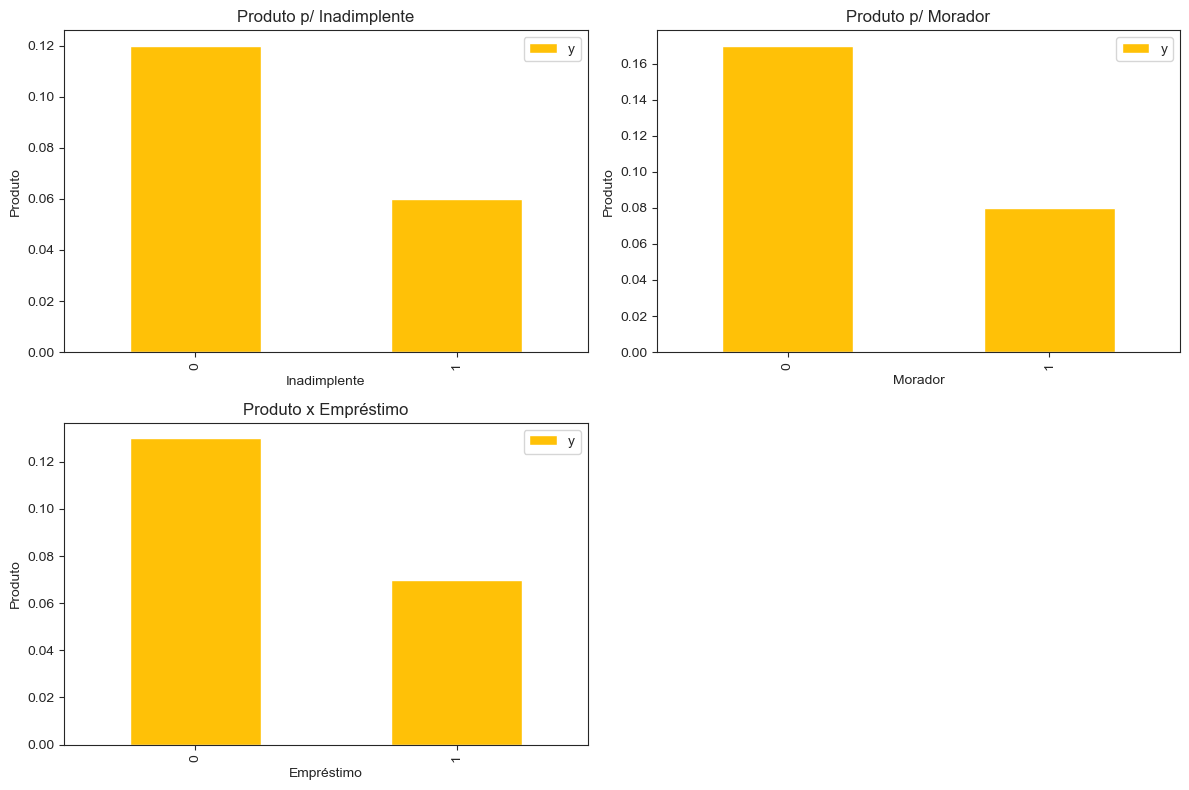

In [32]:
fig, axes = plt.subplots(2,2, figsize= (12, 8))

media_default.plot(kind='bar', ax=axes[0, 0],color=colors)
axes[0, 0].set_xlabel('Inadimplente')
axes[0, 0].set_ylabel('Produto')
axes[0, 0].set_title('Produto p/ Inadimplente')

media_housing.plot(kind='bar', ax=axes[0, 1],color=colors)
axes[0, 1].set_xlabel('Morador')
axes[0, 1].set_ylabel('Produto')
axes[0, 1].set_title('Produto p/ Morador')


media_loan.plot(kind='bar', ax=axes[1, 0],color=colors)
axes[1, 0].set_xlabel('Empréstimo')
axes[1, 0].set_ylabel('Produto')
axes[1, 0].set_title('Produto x Empréstimo')

axes[1, 1].set_visible(False)

plt.tight_layout()
plt.show()





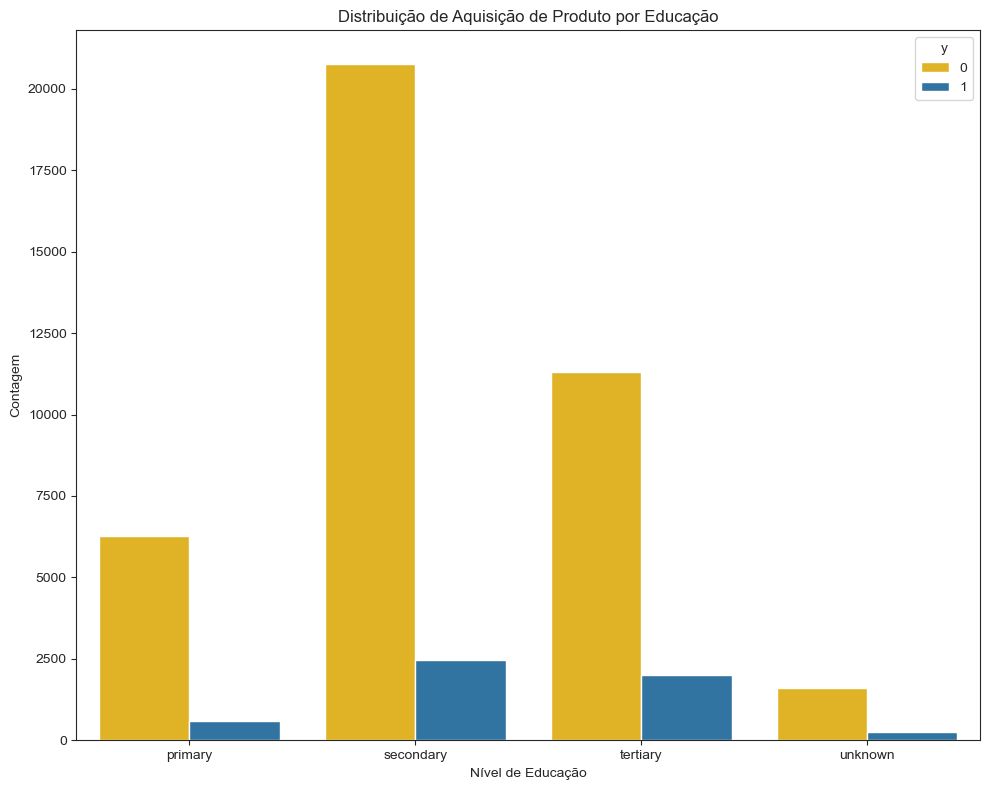

In [45]:
plt.figure(figsize=(10,8))

sns.barplot(x='education', y='count', hue='y', palette=colors, data=education_y)

plt.title('Distribuição de Aquisição de Produto por Educação')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.tight_layout()

plt.show()

In [58]:
estado_civil = bank.groupby('y')['marital'].value_counts().reset_index()

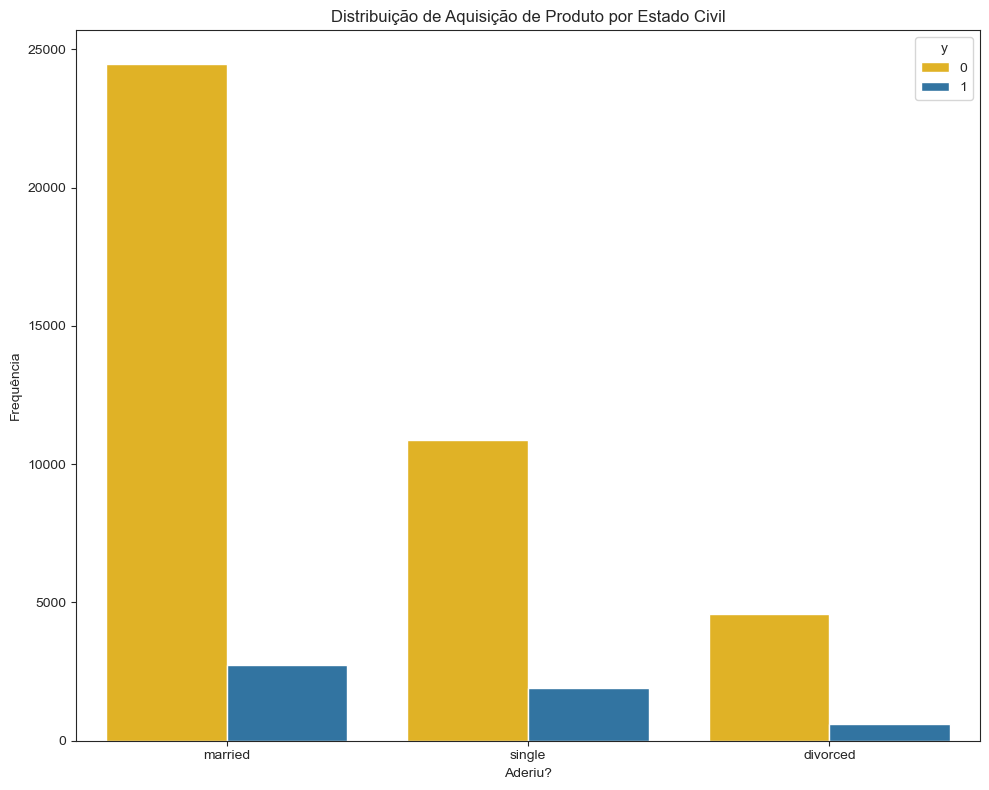

In [56]:
plt.figure(figsize=(10,8))

sns.barplot(x='marital', y='count',hue='y', palette=colors, data=estado_civil)

plt.title('Distribuição de Aquisição de Produto por Estado Civil'),
plt.xlabel('Aderiu?'),
plt.ylabel('Frequência'),
plt.tight_layout()

plt.show()

In [ ]:
# Inadimplentes possuem a menor taxa de aquisição do produto, casados são mais propensos ao produto.

In [34]:
education_default = pd.crosstab(bank['education'], bank['default'])

In [59]:
print(education_default)

default       no  yes
education            
primary     6724  127
secondary  22744  458
tertiary   13103  198
unknown     1825   32


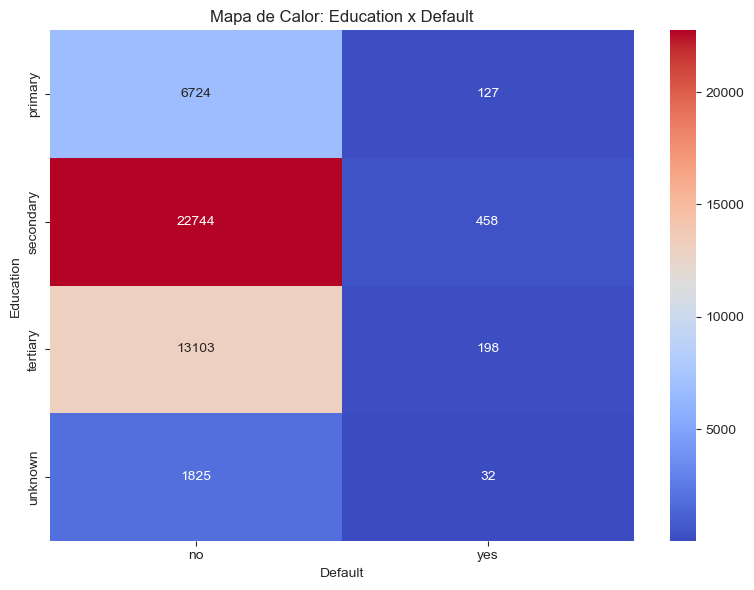

In [60]:
plt.figure(figsize= (8, 6))

sns.heatmap(education_default, annot=True,fmt='d', cmap='coolwarm')
plt.title('Mapa de Calor: Education x Default')
plt.xlabel('Default')
plt.ylabel('Education')

plt.tight_layout()
plt.show()

In [37]:
numericas = bank.select_dtypes(include='number').columns
correlacao = bank[numericas].corr()

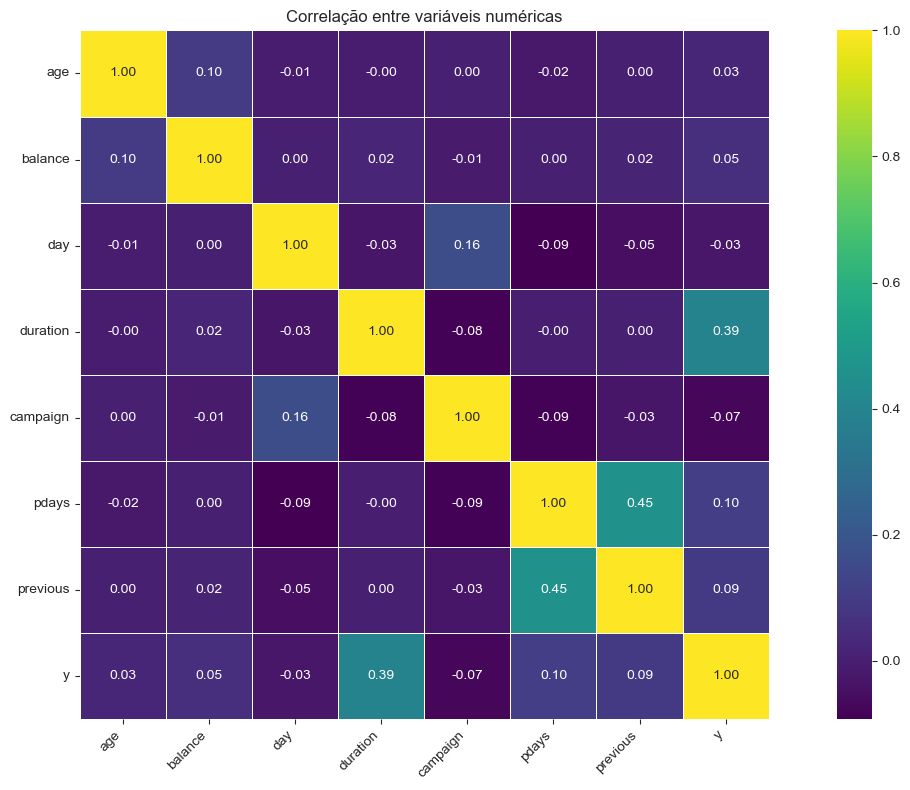

In [38]:
plt.figure(figsize=(14, 8))

sns.heatmap(correlacao,
           annot=True,
           cmap='viridis',
           fmt='.2f',
           linewidth=0.5,
           linecolor='white',
           square=True)
plt.title('Correlação entre variáveis numéricas'),
plt.xticks(rotation=45, ha='right'),
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Parte 2 - Modelo de Classificação

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [62]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype='object')

In [63]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',

            'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
target= ['y']

In [64]:
X= bank[features]
y= bank[target]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [66]:
categorical_features =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome']
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [67]:
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformers = ColumnTransformer(
    transformers=[('cat', categorical_pipeline, categorical_features)])


In [68]:
X_train_transformed = transformers.fit_transform(X_train, y_train)
X_test_transformed = transformers.transform(X_test)

In [69]:
tree = DecisionTreeClassifier()

In [70]:
tree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [71]:
y_pred = tree.predict(X_test_transformed)

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
y_test.values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [74]:
print(f'Acurácia : {accuracy_score(y_test, y_pred):.2f}')
print(f'ROC_AUC : {roc_auc_score(y_test, y_pred):.2f}')
print(f'Recall : {recall_score(y_test, y_pred):.2f}')
print(f'F1 : {f1_score(y_test, y_pred):.2f}')
print(f'Precisão : {precision_score(y_test, y_pred):.2f}')

Acurácia : 0.88
ROC_AUC : 0.60
Recall : 0.23
F1 : 0.31
Precisão : 0.49


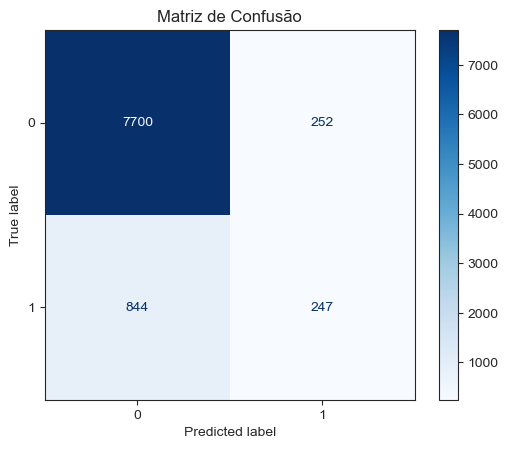

In [75]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

In [76]:
#Random Forest

In [77]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [78]:
rf_pipeline= Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42))
])

In [79]:
rf_pipeline.fit(X_train, y_train.values.ravel())
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]

In [80]:
print(classification_report(y_test, y_pred_rf))
print("AUC RF:", roc_auc_score(y_test, y_proba_rf))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7952
           1       0.69      0.33      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

AUC RF: 0.9250437316843314


In [81]:
#Xgboost

In [82]:
xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=8, random_state=42))
])


In [83]:
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
y_proba_xgb = xgb_pipeline.predict(X_test)[:1]

In [84]:
print(classification_report(y_test, y_pred_xgb))
print("AUC XGBoost:", roc_auc_score(y_test, y_proba_xgb))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7952
           1       0.48      0.82      0.61      1091

    accuracy                           0.87      9043
   macro avg       0.73      0.85      0.77      9043
weighted avg       0.91      0.87      0.89      9043



ValueError: Found input variables with inconsistent numbers of samples: [9043, 1]

Parte 3 - Permutation Importance

In [85]:
from sklearn.inspection import permutation_importance

In [86]:
X_test_dense = X_test_transformed.toarray()

In [87]:
result = permutation_importance(tree, X_test_dense, y_test, n_repeats=10, random_state=42)

In [88]:
feature_names = transformers.get_feature_names_out()

In [89]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=True)

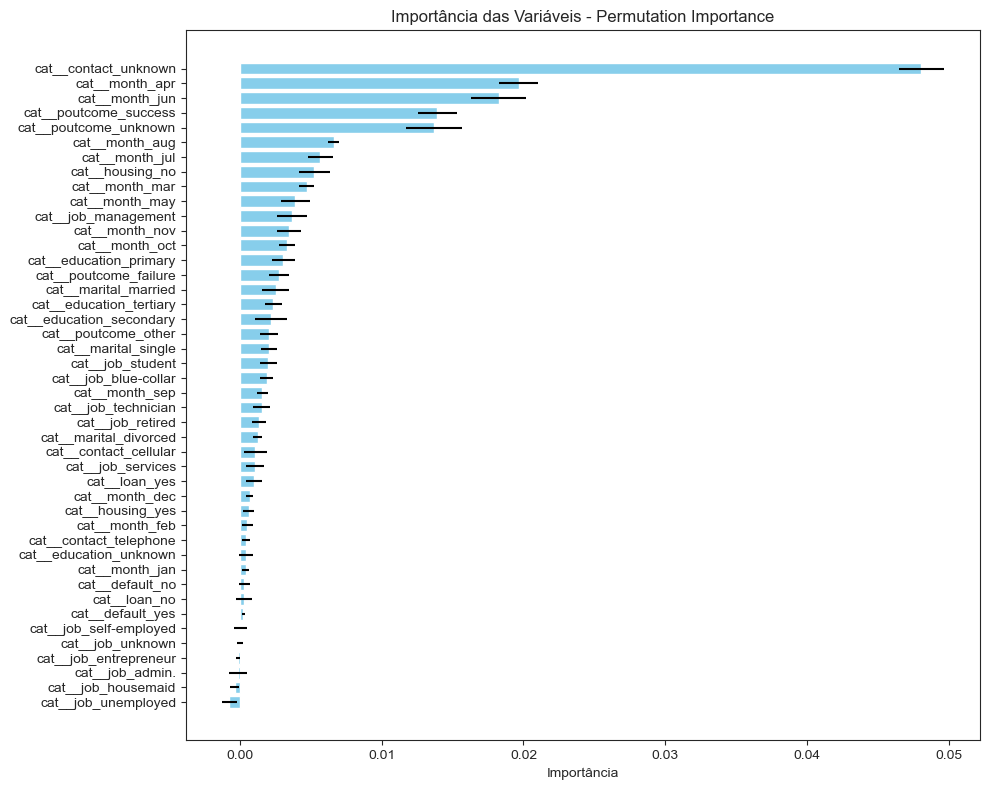

In [90]:
plt.figure(figsize=(10, 8))
plt.barh(
    y=importance_df['Feature'].values,
    width=importance_df['Importance'].values,
    xerr=importance_df['Std'].values,
    color='skyblue'
)
plt.xlabel('Importância')
plt.title('Importância das Variáveis - Permutation Importance')
plt.tight_layout()
plt.show()

In [91]:
#Permutation Importance - Random Forest

In [92]:
rf_model = rf_pipeline.named_steps['model']
encoder = rf_pipeline.named_steps['preprocess'].named_transformers_['cat']
encoded_cat_features = encoder.get_feature_names_out(categorical_features)

In [93]:
all_features = np.concatenate([numerical_features, encoded_cat_features])

In [94]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

In [95]:
# Criar DataFrame
importance_df = pd.DataFrame({
    'Feature': all_features[indices],
    'Importance': importances[indices]
})

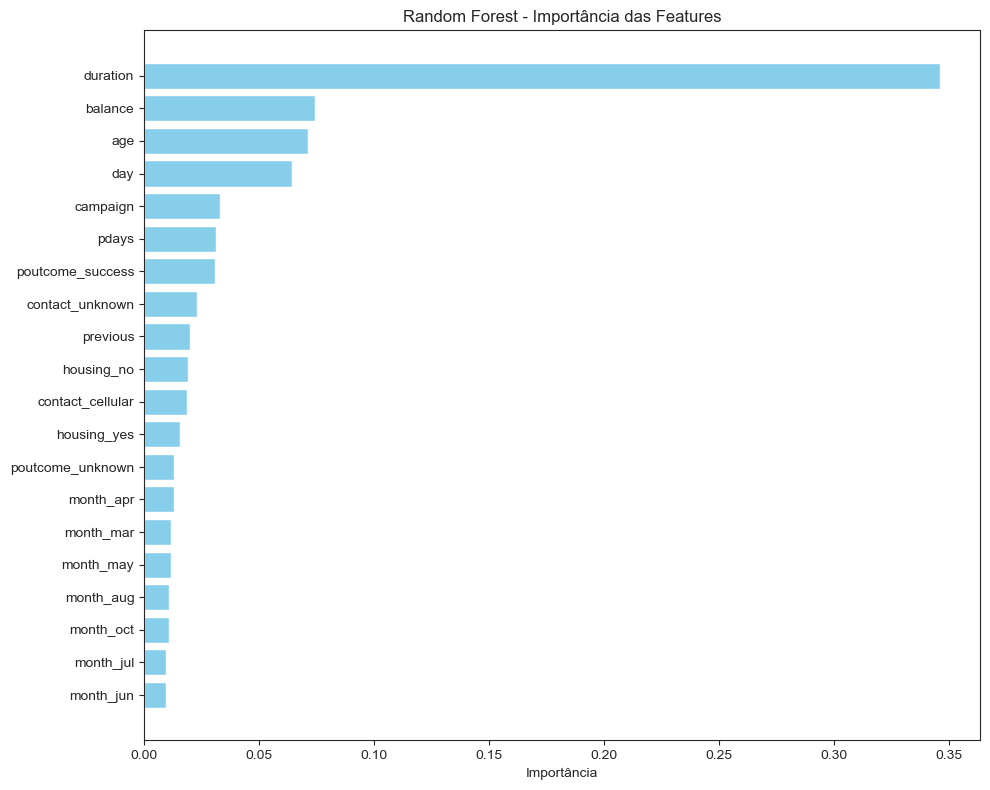

In [96]:
# Visualizar top 20
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1], color='skyblue')
plt.xlabel('Importância')
plt.title('Random Forest - Importância das Features')
plt.tight_layout()
plt.show()

In [97]:
# Permutation Importance Xgboost

In [98]:
xgb_model = xgb_pipeline.named_steps['model']

importances_xgb = xgb_model.feature_importances_

In [99]:
importance_df_xgb = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)


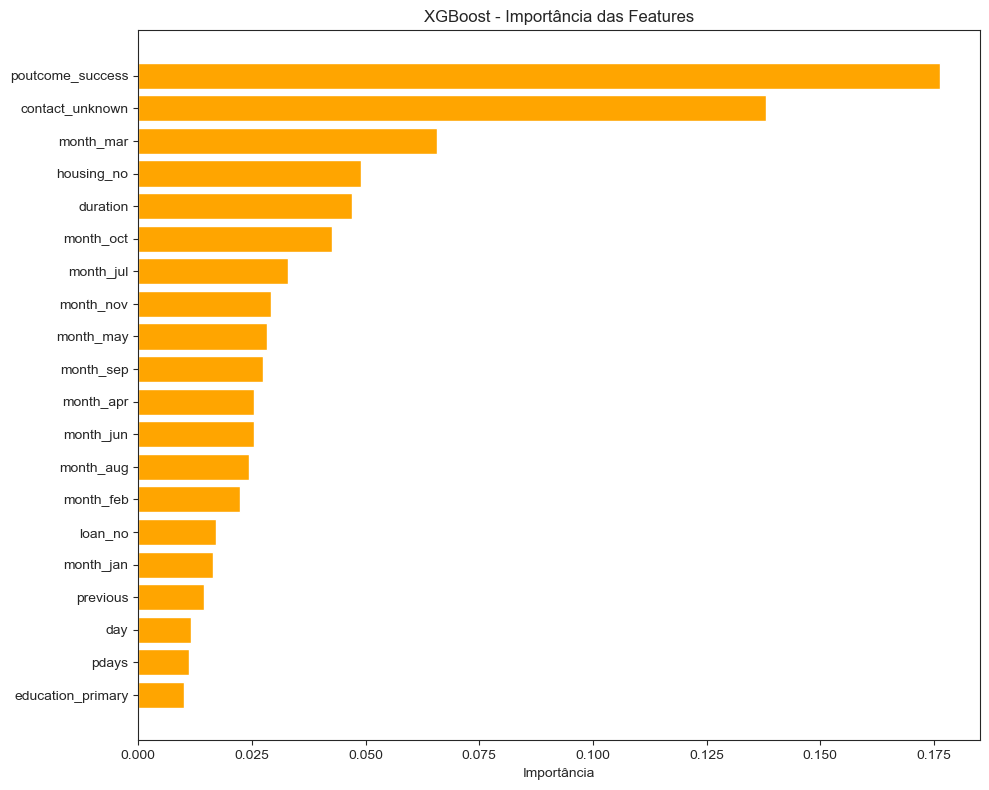

In [100]:
# Visualizar
plt.figure(figsize=(10, 8))
plt.barh(importance_df_xgb['Feature'][:20][::-1], importance_df_xgb['Importance'][:20][::-1], color='orange')
plt.xlabel('Importância')
plt.title('XGBoost - Importância das Features')
plt.tight_layout()
plt.show()

Parte 4 -  Probabilidade

In [101]:
ad_prod = xgb_pipeline.predict_proba(X_test)[:, 1]

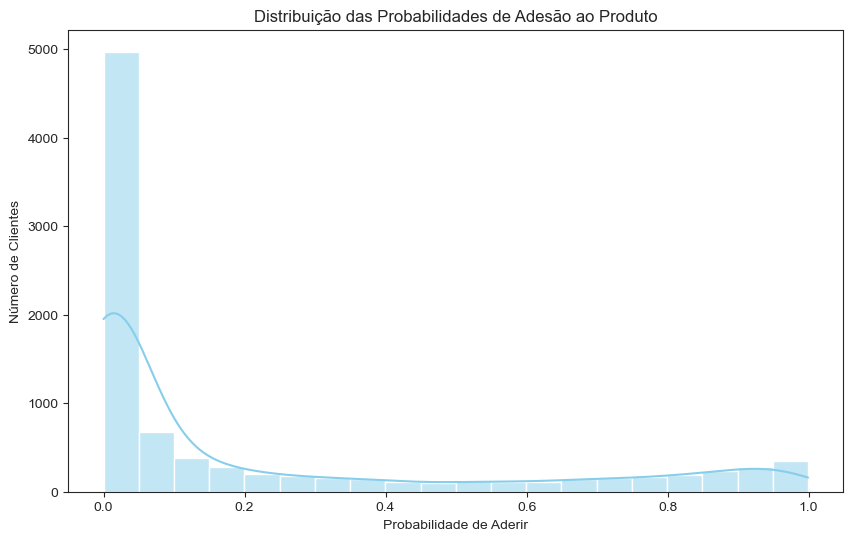

In [102]:
plt.figure(figsize=(10,6))
sns.histplot(ad_prod, bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Probabilidades de Adesão ao Produto')
plt.xlabel('Probabilidade de Aderir')
plt.ylabel('Número de Clientes')
plt.show()

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [104]:
cluster_features = ['age', 'balance', 'job', 'education', 'contact', 'pdays', 'previous']

df_cluster = bank[cluster_features].copy()

In [105]:
cluster_pipe= ColumnTransformer([
    ('num', StandardScaler(), ['age','balance','pdays', 'previous']),
    ('cat', OneHotEncoder(), ['job', 'education', 'contact'])
])

In [106]:
X_cluster_ready = cluster_pipe.fit_transform(df_cluster)


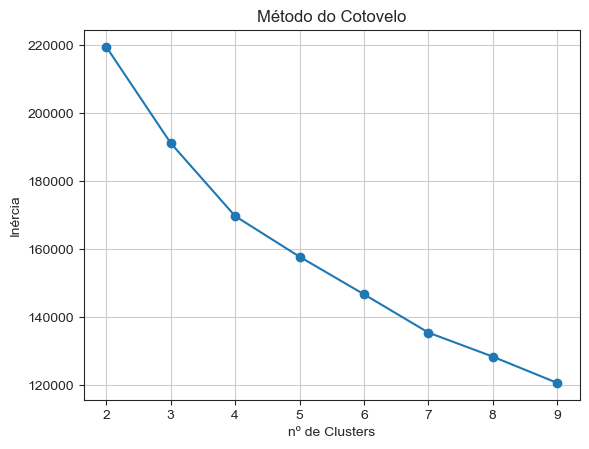

In [107]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_cluster_ready)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('nº de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

In [108]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_cluster_ready)
bank['cluster'] = clusters

In [109]:
bank.groupby('cluster')['y'].value_counts(normalize=True).unstack().round(3) * 100

y,0,1
cluster,,
0,80.2,19.8
1,89.1,10.9
2,90.0,10.0


In [110]:
bank.groupby('cluster')[['age', 'balance', 'pdays', 'previous']].mean()

,age,balance,pdays,previous
cluster,,,,
0,39.359869,1364.412993,259.668173,3.527652
1,52.469377,2054.450124,6.774200,0.140672
2,34.161817,929.697593,2.076240,0.062633


In [111]:
bank.groupby('cluster')[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y']].mean()

,age,balance,duration,campaign,pdays,previous,y
cluster,,,,,,,
0,39.359869,1364.412993,257.151893,2.129771,259.668173,3.527652,0.198317
1,52.469377,2054.450124,253.265647,2.869860,6.774200,0.140672,0.108942
2,34.161817,929.697593,261.491396,2.868076,2.076240,0.062633,0.100147


In [112]:
bank['cluster'] = clusters

In [113]:
# Supondo que df_test tenha o mesmo índice de X_test_transformed
bank = bank.loc[X_test.index].copy()  # copiar as linhas do df original que correspondem ao teste

# Adicionar a coluna com a probabilidade
bank['probabilidade_aquisicao'] = ad_prod

# Visualizar as primeiras linhas
print(bank[['probabilidade_aquisicao']].head())

       probabilidade_aquisicao
3776                  0.010354
9928                  0.016283
33409                 0.392707
31885                 0.061424
15738                 0.008740


In [114]:
cluster_y = bank.groupby('y')['cluster'].value_counts(1).reset_index()

In [115]:
cluster_y

,y,cluster,proportion
0,0,2,0.538984
1,0,1,0.331112
2,0,0,0.129904
3,1,2,0.466544
4,1,1,0.311641
5,1,0,0.221815


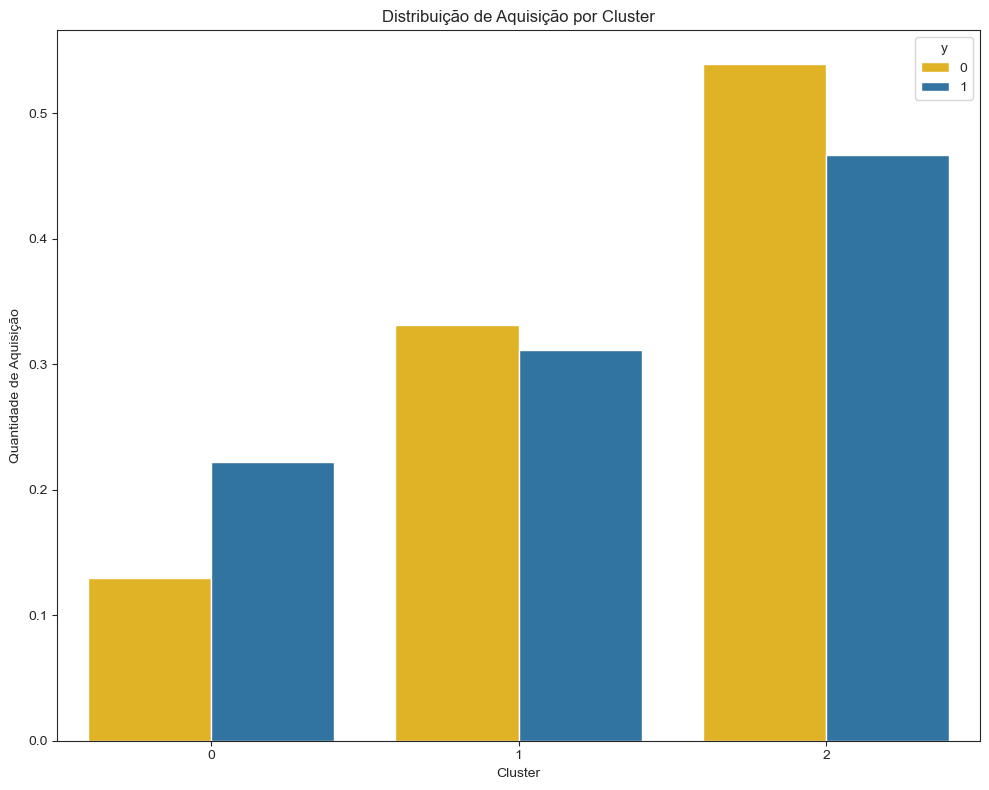

In [116]:
plt.figure(figsize=(10,8))

sns.barplot(x='cluster', y='proportion', hue='y', palette=colors, data=cluster_y)
plt.title('Distribuição de Aquisição por Cluster'),
plt.xlabel('Cluster'),
plt.ylabel('Quantidade de Aquisição')
plt.tight_layout()

plt.show()

In [117]:
bank.groupby('cluster')[['y','campaign']].mean().reset_index()

,cluster,y,campaign
0,0,0.189804,2.167843
1,1,0.114363,2.876892
2,2,0.106152,2.838582


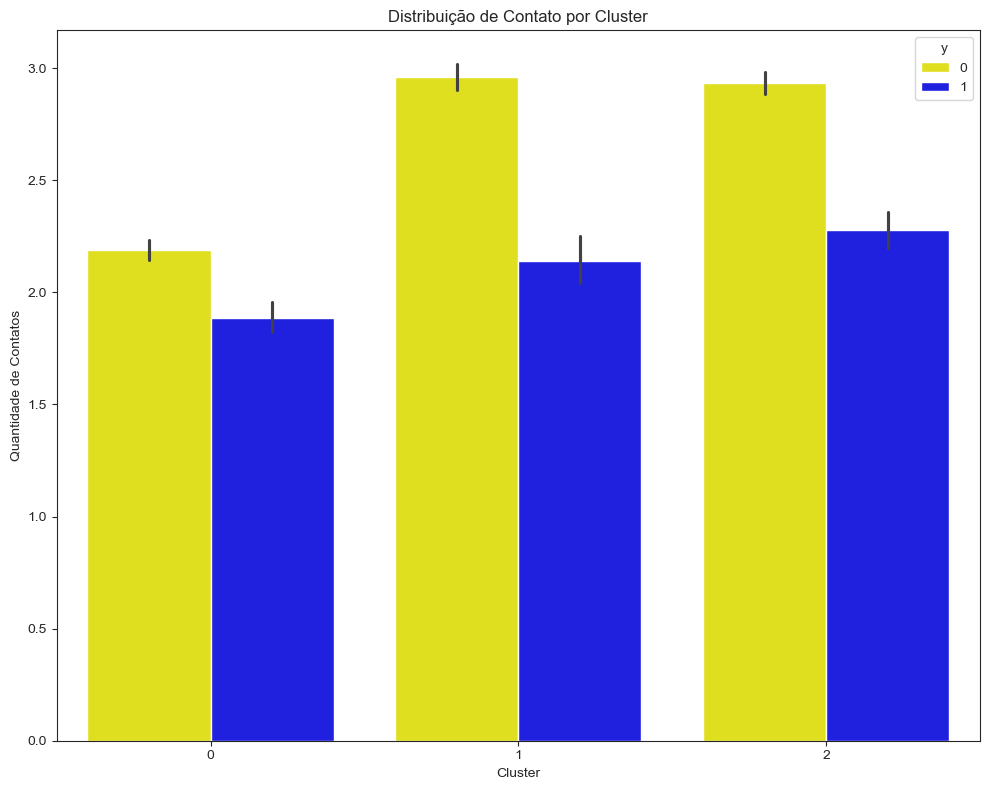

In [196]:
plt.figure(figsize=(10,8))

sns.barplot(x='cluster', y='campaign', hue='y', palette=colors, data=bank)
plt.title('Distribuição de Contato por Cluster'),
plt.xlabel('Cluster'),
plt.ylabel('Quantidade de Contatos')
plt.tight_layout()

plt.show()

In [215]:
bank['probabilidade_aquisicao'] = bank['probabilidade_aquisicao'].round(2)

In [216]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster,probabilidade_aquisicao
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,0,2,0.01
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,0,1,0.02
33409,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,0,2,0.39
31885,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,0,0,0.06
15738,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,0,1,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13353,47,management,married,tertiary,no,1890,no,no,cellular,8,jul,161,1,-1,0,unknown,0,1,0.13
38732,32,blue-collar,single,secondary,no,217,yes,no,cellular,15,may,692,3,-1,0,unknown,1,2,0.91
5654,52,admin.,divorced,secondary,no,0,yes,no,unknown,26,may,206,1,-1,0,unknown,0,1,0.01
3779,40,admin.,divorced,secondary,no,783,yes,yes,unknown,16,may,171,2,-1,0,unknown,0,2,0.00


In [217]:
bank.to_csv('bank.csv', index=False)